# Sampling

In both experimental and observational studies, the goal is to come to a conclusion about a certain *population*. That population may consist of cancer patients, residents of Hyde Park, or students in this data science course. A survey of every *unit* – or individual member – of a population is known as a *census*. Often, it is not possible to collect data on every subject in a population. For example, I may be able to survey all students in this course, but it would be difficult to survey every Hyde Park resident. This is due to logistical issues, the amount of time it would take, and the expense. For these reasons, researchers often study a *sample* of the population and use that sample to gain information about the entire population through statistical inference. The numerical characteristic of the sample gained through statistical inference is known as a *statistic*. Statistics are used to estimate values of *parameters*, which are numerical characteristics of the entire population.

## Sampling Designs

In order to be able to generalize from the sample to the population as a whole, the sample must be *representative* of the population. Otherwise, inference on that sample may produce misleading conclusions. For example, if a researcher is interested in understanding how those living on the southside of Chicago view the University of Chicago, and the researcher collects a sample of 50 first years attending the University of Chicago, the feelings of this sample of first years is most likely not representative of the feelings of everyone living on the southside. Similarly, if a cancer researcher wants to know how well a drug works on cancer patients, but uses a sample consisting only of men under 30, any conclusions she might draw from the experiment cannot be generalized to the entire population but rather to only the population of men under 30.

There are two *sampling designs*, or processes by which a sample is collected, that suffer from this lack of generalizability yet sometimes cannot be avoided. The first is known as a *convenience sample*. A convenience sample is, as its name suggests, a sample that is collected out of ease of access for the researchers. Looking through research in psychology in particular, many researchers collect a convenience sample of students from introductory psychology courses. Though this is an easy way of gathering a sample, it is not the most generalizable, as introductory psychology students are likely not representative of the broader population the researchers seek to understand. A second example of a sampling design that is not generalizable is the *voluntary response sample*, where participants volunteer to be part of the study. Restaurant reviews provide a nice example of a voluntary response sample. Those with strong opinions of the restaurant (either positive or negative) are more likely to write reviews. Voluntary response samples oversample those who feel strongly about the topic being studied and undersample those who do not care as much. These samples are always *biased*, or not representative of the broader population.

There are several sampling designs that are meant to help collect a more representative sample. The first is a *simple random sample (SRS)*. In a simple random sample of size `n`, every group of `n` units in the population has an equal chance of being selected as the sample. This eliminates sampling bias by ensuring that portions of the population are not over- or under-sampled. In addition, SRS allows a researcher to mathematically or computationally quantify variation due to sampling (*i.e.* the precision of a statistic). The downside of SRS is that it requires a *sampling frame*, or list of names or IDs of all units in a population. Aquiring such a sampling frame is impractical for large populations. 

The next sampling design is a *stratified random sample* which divides the population into sub-populations of similar units (called strata) and chooses a separate SRS for each stratum. This allows a researcher to gain more exact information than SRS of the same size, by ensuring that each stratum is equally represented in the sample. Many universities employ stratified random sampling when conducting surveys gauging student or factulty opinions. Those conducting the survey split the population of university students into strata by year (*e.g.* first years, second years, third years, and fourth years); then, they take a simple random sample of students from each stratum. This sampling design works well when cases within a stratum are similar but there are large differences between strata. However, it has the same downside as a SRS as it too needs sampling frames for each stratum.

The next sampling design is *cluster sampling*, which is commonly confused with stratified random sampling as both split the population into sub-populations. However, cluster sampling splits the population into clusters and takes a random sample *of* those clusters. Rather than taking a random sample *within* subpopulations as in stratified random sampling. This sampling design works well when there is small variation between clusters but large variation within clusters. Cluster sampling is commonly used for geographical and market research. For example, the head of a major department store may be interested in how well a particular product is selling. Rather than analyzing all sales for all stores across the whole country, the market research team would cluster sales by store and take a random sample of stores.

The image below depicts each type of sampling (in maroon) from a population of 100 (in grey). Panel *a* shows the full population before sampling. Panel *b* shows a simple random sample of 10 units. Panel *c* shows a stratified random sample of 10 units with 5 strata. Panel *d* shows a cluster sample of 10 units with 20 clusters.

```{figure} ./sampling-schemes.png
---
align: center
---
Sampling Designs
```

The last type of sampling we will discuss, *multistage sampling*, conducts sampling in stages and is often used for large nationwide samples of households or individuals. The major advantage of multistage sampling is that it does not require a complete sampling frame. For example, consider a polling company interested in obtaining a generalizable sample of American households. First, they might stratify households by state to ensure sampling from each state. Within states, they might cluster households by county and take a simple random sample of those counties. Lastly, they take a simple random sample of `n` households from each of the sampled counties. This sampling strategy is depicted below. Multistage sampling mixes stratified and cluster sampling in stages and, as a result, the researcher never requires a list of all households in the US, but rather a sampling frame of US counties and then a sampling frame of households within a much smaller subset of US counties.

```{figure} ./multistage-sampling.png
---
align: center
---
Example of Multistage Sampling
```

## Biases

Recall the introduction to this chapter where we stated that bigger data is not always better. This is often due to the sampling method used to gather that "Big Data". We have already discussed the need for representative samples to ensure generalization of the sample to the population. The bias introduced by oversampling some portions of the population over others is known as *selection bias*. However, this is not the only bias that can be introduced during the data collection process. Imagine sampling participants and emailing each participant a survey to complete. Some participants might not complete that survey. *Non-response bias* occurs when the people who decline to respond are different in some meaningful way than those who do respond. Perhaps you wish to study parenting and all single parents were too busy to complete the survey. Your study would be missing an important perspective.

Let's simulate data that suffers from non-response bias. First, we create a ground truth dataset. Imagine we are studying student satisfaction at UChicago and we send surveys to 400 students using stratified random sampling by year in school. Students are asked to rank their satisfaction on a scale of 1 to 5 with 5 being more satisfied and 1 being less satisfied. We also ask students to report their average letter grade. We assume that students with lower grades are more likely to be less satisfied and those with high grades are more likely to be more satisfied.

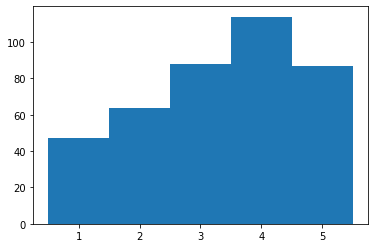

In [117]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(92)

grades = ["A","B","C","D","F"]
satisfaction = [1,2,3,4,5]

def get_satisfaction(grade):
    if (grade == "A") | (grade == "B"):
        sat = np.random.choice(satisfaction, 1, p=[.05,.05,.2,.3,.4])
    elif (grade == "D") | (grade == "F"):
        sat = np.random.choice(satisfaction, 1, p = [.25,.35,.25,.1,.05])
    else:
        sat = np.random.choice(satisfaction, 1, p = [.05,.1,.25,.35,.25])
    return sat
get_satisfaction_vec = np.vectorize(get_satisfaction)

student_grades = np.random.choice(grades, 400, [.35,.3,.25,.05,.05])

student_satisfaction = get_satisfaction_vec(student_grades)

student_survey = pd.DataFrame({'student_grades':student_grades,'student_satisfaction':student_satisfaction})

plt.hist(student_survey.student_satisfaction, bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.show()

Overall, there are more students who are satisfied with UChicago than those who are unsatisfied. However, it is unlikely that all student who are sent the survey will complete it. Assume those with stronger opinions on UChicago are more likely to respond to the survey. Students are busy with schoolwork so those with less strong opinions respond with 50% likelihood.

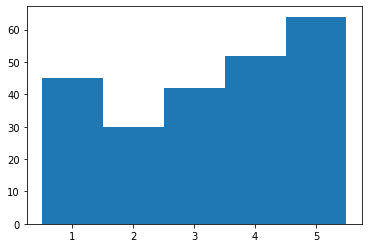

In [140]:
np.random.seed(1234)

def get_response(sat):
    if sat == 1:
        response = np.random.choice([True,False], 1, p=[.95,.05])
    elif sat == 5:
        response = np.random.choice([True,False], 1, p = [.8,.2])
    else:
        response = np.random.choice([True,False], 1, p = [.5,.5])
    return response
get_response_vec = np.vectorize(get_response)

student_survey['response'] = get_response_vec(student_survey.student_satisfaction)
student_survey_biased = student_survey[student_survey["response"] == True]


plt.hist(student_survey_biased.student_satisfaction, bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.show()

The non-response bias changes the distribution of satisfaction scores, making it look like more students are responding with 1's and 5's than there are in truth.

Turning attention from those who did not respond to those who did, their responses can suffer from *response bias*. Response bias can appear in multiple formats. Sometimes, participants have an incentive to respond in ways that might not be truthful, especially if questions are sensitive or embarrassing. For example, in a survey of campus sexual health, students might be embarrassed to report STIs, and therefore trends in these data may be misleading. This can be influenced by the wording or tone of the questions as well as if participants have been ensured their data will be kept private. Some response bias can be due more to boredom than truthfulness. For example, especially in long surveys, participants may care more about completing the task than completing the task well. Some participants may choose to select random answers, select the same answer for every question, or answer questions in a pattern. It is important for a researcher to consider the wording, tone and length of a survey carefully, and to check all surveys for possible response bias before analyzing data.

Suppose I want to know how many college students have cheated on an exam at some point in their lives. Students are less likely to respond truthfully about cheating which could create response bias in my sample. One strategy for combatting this type of response bias is to use a tecnique known as *random response*. Instead of asking all students to respond truthfully, I ask them to flip 2 coins without letting me see the results. If the first coin lands on heads, they should give a truthful answer. If it lands on tails, they answer "yes" if the second coin lands on heads and "no" if the second coin lands on tails. This inserts randomness into response ensuring that the researcher does not know who answered truthfully and therefore does not know who has cheated in the past. This encourages students to give truthful answers when prompted and allows the researcher to calculate an estimate of the true proportion of students who have cheated. Let's explore this in a simulation. 

Let the true proportion of students who have cheated be 40%. We can simulate the truthful answers and coin flips of 100 students with the following code. 

In [206]:
np.random.seed(1840)

truth=np.random.choice(["Yes","No"],100,p=[.4,.6])
flip1=np.random.choice(["Heads","Tails"],100)
flip2=np.random.choice(["Heads","Tails"],100)



The reported answers given by students in our random response survey would be the following.

In [207]:
reported=truth.copy()
reported[(flip1=="Tails")&(flip2=="Heads")]="Yes"
reported[(flip1=="Tails")&(flip2=="Tails")]="No"

sum(reported=="Yes")/100

46

Compare this to the true proportion.

In [208]:
sum(truth=="Yes")/100

44

Based on the coinflips about half of the participants responded truthfully. We also know that about a quarter of the participants falsely responded "yes" and a quarter falsely responded "no". Therefore, if we call the probability of truthfully responding "yes" $p$, the probability of seeing a response of "yes" is $2*p + 1/4$. Solving for $p$ the probability of a truthful yes is $(1/2)*P(yes)-1/4$. Which is a good estimate for our true probability of 40% and the truthful proportion of .44.

In [210]:
2*(sum(reported=="Yes")/100) - 1/2

0.42000000000000004